**ELEVATE LABS AI/ML INTERNSHIP TASK 7**

*📓 Task 7:  Support Vector Machines (SVM) — Breast Cancer Dataset*

We’ll classify tumor cases as benign or malignant using both Linear and RBF SVM kernels, visualize decision boundaries (via PCA), and use GridSearchCV for hyperparameter tuning.

In [3]:
# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA


In [4]:
# 2. Load and clean dataset
df = pd.read_csv("breast-cancer.csv")

# Drop ID column
df.drop(['id'], axis=1, inplace=True)

# Encode target label
df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])  # 1 = M, 0 = B

# Separate features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)


In [5]:
# 3. Train SVM models with different kernels
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)

rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train, y_train)

# Evaluation
print("Linear SVM Accuracy:", accuracy_score(y_test, linear_svm.predict(X_test)))
print("RBF SVM Accuracy:", accuracy_score(y_test, rbf_svm.predict(X_test)))


Linear SVM Accuracy: 0.9649122807017544
RBF SVM Accuracy: 0.9736842105263158


In [6]:
# 4. Hyperparameter tuning with GridSearchCV
params = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), params, cv=5)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best CV score:", grid.best_score_)


Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV score: 0.9736263736263737


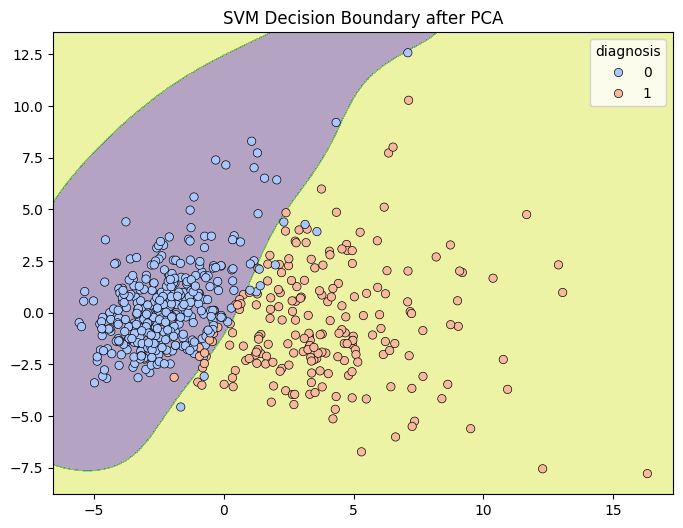

In [7]:
# 5. PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Fit on PCA-reduced data
svm_2d = SVC(kernel='rbf', C=grid.best_params_['C'], gamma=grid.best_params_['gamma'])
svm_2d.fit(X_pca, y)

# Decision boundary
h = .02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.4)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm', edgecolor='k')
plt.title("SVM Decision Boundary after PCA")
plt.show()
